# Skin Cancer

Skin cancer is the most common human malignancy, is primarily diagnosed visually, beginning with an initial clinical screening and followed potentially by dermoscopic analysis, a biopsy and histopathological examination. Automated classification of skin lesions using images is a challenging task owing to the fine-grained variability in the appearance of skin lesions.

The dataset is taken from the ISIC (International Skin Image Collaboration) Archive. It consists of 1800 pictures of benign moles and 1497 pictures of malignant classified moles. The pictures have all been resized to low resolution (224x224x3) RGB. The task of this kernel is to create a model, which can classify a mole visually into benign and malignant.

As the dataset is pretty balanced, the model will be tested on the accuracy score, thus (TP + TN)/(ALL).

It has 2 different classes of skin cancer which are listed below :
1. Benign
2. Malignant

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.models import Model
from keras.layers import Convolution2D, Conv2D
from keras.layers import MaxPooling2D, MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

## CNN Model

In [2]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, kernel_initializer = 'uniform', input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(64, 3, 3, kernel_initializer = 'uniform', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 74, 74, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [10]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Image Augumentation and Preprocessing

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:\ML Python\MY_DATA\Cancer\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')
test_set = train_datagen.flow_from_directory('D:\ML Python\MY_DATA\Cancer\\test',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


## Fitting the CNN Model

In [12]:
history = model.fit(training_set, 
                    epochs = 25,
                    batch_size = 64,
                    validation_data = test_set)

Epoch 1/25
42/42 [==============================] - 72s 2s/step - loss: 0.6469 - accuracy: 0.5958 - val_loss: 0.5661 - val_accuracy: 0.7106
Epoch 2/25
42/42 [==============================] - 57s 1s/step - loss: 0.5561 - accuracy: 0.7228 - val_loss: 0.4975 - val_accuracy: 0.7394
Epoch 3/25
42/42 [==============================] - 51s 1s/step - loss: 0.4885 - accuracy: 0.7531 - val_loss: 0.5284 - val_accuracy: 0.7485
Epoch 4/25
42/42 [==============================] - 53s 1s/step - loss: 0.4800 - accuracy: 0.7710 - val_loss: 0.5866 - val_accuracy: 0.6818
Epoch 5/25
42/42 [==============================] - 52s 1s/step - loss: 0.4695 - accuracy: 0.7694 - val_loss: 0.4090 - val_accuracy: 0.7939
Epoch 6/25
42/42 [==============================] - 53s 1s/step - loss: 0.4161 - accuracy: 0.7926 - val_loss: 0.3848 - val_accuracy: 0.7970
Epoch 7/25
42/42 [==============================] - 52s 1s/step - loss: 0.4135 - accuracy: 0.7888 - val_loss: 0.3933 - val_accuracy: 0.8045
Epoch 8/25
42/42 [==

## Visualization of the Results

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


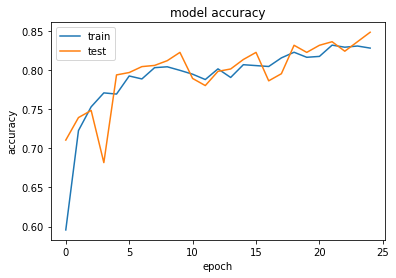

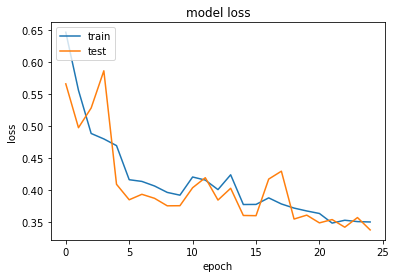

In [44]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Predicting

In [13]:
training_set.class_indices

{'benign': 0, 'malignant': 1}

In [51]:
from keras.preprocessing import image
test_image = image.load_img('D:\ML Python\MY_DATA\Cancer\prediction\\test_1.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Malignant'
else:
    prediction = 'Benign'

In [52]:
prediction

'Malignant'

In [57]:
test_image = image.load_img('D:\ML Python\MY_DATA\Cancer\prediction\\test_6.jpg', target_size = (224, 224))

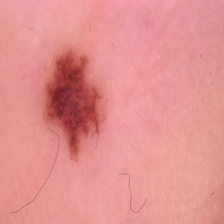

In [58]:
test_image

In [55]:
test_image = image.load_img('D:\ML Python\MY_DATA\Cancer\prediction\\test_1.jpg', target_size = (224, 224))

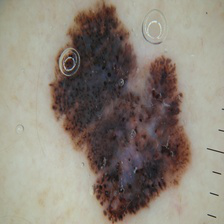

In [56]:
test_image

In [3]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [4]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [6]:
import keras
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(training_set, 
                    epochs = 25,
                    batch_size = 64,
                    validation_data = test_set)

Epoch 1/25


In [5]:
from keras.applications.vgg16 import VGG16
from glob import glob
# Add preprocessing layer to the front of VGG
IMAGE_SIZE = [224, 224]
folders = glob('D:\ML Python\MY_DATA\Cancer\\train/*')
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

# Don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
# Our layers, can add more if we want
x = Flatten()(vgg.output)
# x = Dense(1000, actiavtion = 'relu')(x)
prediction = Dense(units = len(folders), activation = 'sigmoid')(x)
# Create a model object
classifier = Model(inputs = vgg.input, outputs = prediction)
# View the structure of the model
classifier.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [6]:
# Telling the model what cost(lost) and optimization method to use
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# fit the model
r = classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
42/42 [==============================] - 805s 19s/step - loss: 0.3517 - accuracy: 0.8411 - val_loss: 0.3458 - val_accuracy: 0.8409
Epoch 2/10
42/42 [==============================] - 866s 21s/step - loss: 0.3264 - accuracy: 0.8525 - val_loss: 0.3365 - val_accuracy: 0.8530
Epoch 3/10
42/42 [==============================] - 747s 18s/step - loss: 0.3148 - accuracy: 0.8639 - val_loss: 0.3592 - val_accuracy: 0.8258
Epoch 4/10
42/42 [==============================] - 870s 21s/step - loss: 0.3186 - accuracy: 0.8536 - val_loss: 0.3468 - val_accuracy: 0.8470
Epoch 5/10
42/42 [==============================] - 755s 18s/step - loss: 0.2971 - accuracy: 0.8703 - val_loss: 0.3511 - val_accuracy: 0.8470
Epoch 6/10
42/42 [==============================] - 744s 18s/step - loss: 0.2921 - accuracy: 0.8718 - val_loss: 0.3360 - val_accuracy: 0.8439
Epoch 7/10
42/42 [==============================] - 683s 16s/step - loss: 0.2812 - accuracy: 0.8745 - val_loss: 0.3344 - val_accuracy: 0.8545
Epoch 

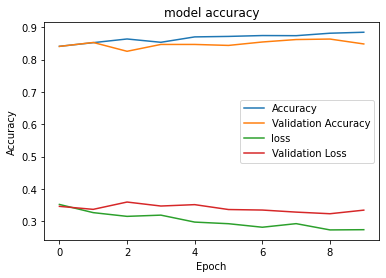

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history["accuracy"])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()